<h1> Report Classification Almond Types</h1>

<b>We are using the "Clean_Almond.csv" as a data Framework</b>
<p>To see the Process and explanation of how and why it has been cleaned, with the logic behind it, please check out "classification-tests.ipynb"</p>

<b>Aim</b>
<ul>
<li>Analyse the Dataset and check for ways to optimize</li>
<li>Optimize towards a ML set that Classifies the Type of Almond</li>
<li>For Analysation use:</li>
    <ul>
    <li>Ydata </li>
    <li>dataprep (needs python 3.9)</li>
    <li>AutoViz</li>
    <li>SweetViz</li>
    <li>Phik-Matrix</li>

</ul>
<li>To Answer the following Questions</li>
    <ol>
    <li>Is there Redundancy?</li>
    <li>Problems in the Dataset, like missing Data, or duplicate Rows (Already nswered in the Data Cleaning)</li>
    <li>Is there Overlapping Data and Noise?</li>
    <li>Significant Outliers</li>
    <li>Is the Target Variable Distribution Optimal?</li>
    <li>Are the independent Variables balanced?</li>
    <li>Any other out of the ordinary in your dataset that we should keep an eye on</li>
</ol>
</ul>

<h4>Data Import</h4>
<p>Since we are also doing some Manual Programing in this file we are going to import the Dataset and Libraries</p>

In [39]:
import pandas as pd
import numpy as np
import keras
from keras import layers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import tensorflow as tf
import phik
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
df = pd.read_csv("clean_Almond.csv")
df.head()

,Length,Width,Thickness,Area,Perimeter,Roundness,Solidity,Compactness,Aspect_Ratio,Eccentricity,Extent,Convex_Area,Type
0,272.553253,227.940628,127.759132,22619.0,643.813269,0.460467,0.973384,1.458265,1.565795,0.798147,0.681193,23237.5,MAMRA
1,340.942719,234.188126,128.199509,23038.0,680.984841,0.451983,0.957304,1.601844,1.552992,0.755233,0.656353,24065.5,MAMRA
2,344.597992,229.418610,125.796547,22386.5,646.943212,0.178304,0.967270,1.487772,1.696236,0.845151,0.683620,23144.0,MAMRA
3,367.850677,232.763153,125.918808,22578.5,661.227483,0.547965,0.965512,1.540979,1.942538,0.806122,0.685360,23385.0,MAMRA
4,276.140106,230.150742,107.253448,19068.0,624.842706,0.430272,0.951450,1.629395,2.142503,0.844623,0.714800,20041.0,MAMRA


In [41]:
# everything else except the target variable
X = df.drop(["Type"], axis=1)

# have only the target variable here (dependent variable)
y_temp = df['Type']

# since we are doing classification, we have to process our target values with an encoder
# and convert them into a categorical TensorFlow/Keras -format 
le = LabelEncoder()
y_enc = le.fit_transform(y_temp)

# Converting the label into a matrix form
y = tf.keras.utils.to_categorical(y_enc)

#seperate df for the corr function
yf=df
yf['Type']=y_enc


In [42]:
yf

,Length,Width,Thickness,Area,Perimeter,Roundness,Solidity,Compactness,Aspect_Ratio,Eccentricity,Extent,Convex_Area,Type
0,272.553253,227.940628,127.759132,22619.0,643.813269,0.460467,0.973384,1.458265,1.565795,0.798147,0.681193,23237.5,0
1,340.942719,234.188126,128.199509,23038.0,680.984841,0.451983,0.957304,1.601844,1.552992,0.755233,0.656353,24065.5,0
2,344.597992,229.418610,125.796547,22386.5,646.943212,0.178304,0.967270,1.487772,1.696236,0.845151,0.683620,23144.0,0
3,367.850677,232.763153,125.918808,22578.5,661.227483,0.547965,0.965512,1.540979,1.942538,0.806122,0.685360,23385.0,0
4,276.140106,230.150742,107.253448,19068.0,624.842706,0.430272,0.951450,1.629395,2.142503,0.844623,0.714800,20041.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2798,244.866592,192.709366,122.356506,18471.5,653.345233,0.456914,0.931000,1.838965,1.812843,0.762105,0.725739,19840.5,2
2799,366.171509,186.254745,118.708961,17213.5,581.688379,0.642495,0.952706,1.564234,1.705885,0.810162,0.714016,18068.0,2
2800,408.806732,186.196182,119.147224,17510.5,608.315795,0.558189,0.948821,1.681705,1.668084,0.822138,0.718999,18455.0,2
2801,280.646667,188.660828,120.634438,17941.0,630.759446,0.386465,0.944810,1.764701,1.705924,0.797262,0.738191,18989.0,2


<b>This time i will use the phik_matrix from the eginning and not the corr matrix</b>

In [43]:
correlations = yf.corr()
correlations

,Length,Width,Thickness,Area,Perimeter,Roundness,Solidity,Compactness,Aspect_Ratio,Eccentricity,Extent,Convex_Area,Type
Length,1.000000,0.305163,0.160244,0.531570,0.531935,-0.243867,-0.103302,0.169204,0.168499,0.155325,0.014266,0.546709,-0.161348
Width,0.305163,1.000000,0.172416,0.368535,0.307658,-0.022506,-0.020431,0.044480,0.005838,0.003919,-0.017369,0.371082,0.075067
Thickness,0.160244,0.172416,1.000000,0.243066,0.239444,0.089539,0.025498,-0.005071,0.012832,0.029879,0.069234,0.246224,0.195843
Area,0.531570,0.368535,0.243066,1.000000,0.793905,0.226408,0.142245,-0.011408,0.074547,0.076240,0.303895,0.996626,-0.013641
Perimeter,0.531935,0.307658,0.239444,0.793905,1.000000,-0.056064,-0.377505,0.561668,0.104916,0.104578,-0.104688,0.834600,-0.123801
Roundness,-0.243867,-0.022506,0.089539,0.226408,-0.056064,1.000000,0.319786,-0.343409,-0.190626,-0.185414,0.296835,0.199020,0.225965
Solidity,-0.103302,-0.020431,0.025498,0.142245,-0.377505,0.319786,1.000000,-0.866622,-0.070943,-0.055808,0.774073,0.067954,0.277235
Compactness,0.169204,0.044480,-0.005071,-0.011408,0.561668,-0.343409,-0.866622,1.000000,0.058348,0.067903,-0.615750,0.056435,-0.209883
Aspect_Ratio,0.168499,0.005838,0.012832,0.074547,0.104916,-0.190626,-0.070943,0.058348,1.000000,0.345854,-0.040220,0.081940,-0.209061
Eccentricity,0.155325,0.003919,0.029879,0.076240,0.104578,-0.185414,-0.055808,0.067903,0.345854,1.000000,-0.032413,0.083029,-0.181927


<ul>
<li>Width: <p>-0.01819</p></li>
<li>Area: <p>-0.06888</p></li>
<li>Convex_Area <p>-0.09412</p></li>

Overall low correlations with type
</ul>

In [44]:
# compute phik-matrix values
phik_matrix = df.phik_matrix()

phik_matrix

interval columns not set, guessing: ['Length', 'Width', 'Thickness', 'Area', 'Perimeter', 'Roundness', 'Solidity', 'Compactness', 'Aspect_Ratio', 'Eccentricity', 'Extent', 'Convex_Area', 'Type']


,Length,Width,Thickness,Area,Perimeter,Roundness,Solidity,Compactness,Aspect_Ratio,Eccentricity,Extent,Convex_Area,Type
Length,1.000000,0.468891,0.328809,0.739572,0.693808,0.449980,0.122181,0.199238,0.410369,0.358817,0.307387,0.764973,0.381952
Width,0.468891,1.000000,0.291190,0.694956,0.486105,0.197349,0.183906,0.079758,0.207034,0.253578,0.203556,0.684468,0.284169
Thickness,0.328809,0.291190,1.000000,0.460928,0.378158,0.256051,0.049681,0.072787,0.000000,0.000000,0.304876,0.467003,0.278852
Area,0.739572,0.694956,0.460928,1.000000,0.842406,0.376436,0.161451,0.103239,0.250619,0.256171,0.374556,0.994625,0.287699
Perimeter,0.693808,0.486105,0.378158,0.842406,1.000000,0.255076,0.500722,0.568092,0.218634,0.200555,0.338876,0.856967,0.305267
Roundness,0.449980,0.197349,0.256051,0.376436,0.255076,1.000000,0.358773,0.304266,0.647335,0.620591,0.476434,0.387019,0.471345
Solidity,0.122181,0.183906,0.049681,0.161451,0.500722,0.358773,1.000000,0.749895,0.119626,0.074289,0.805820,0.147624,0.364287
Compactness,0.199238,0.079758,0.072787,0.103239,0.568092,0.304266,0.749895,1.000000,0.000000,0.036404,0.540934,0.119866,0.419827
Aspect_Ratio,0.410369,0.207034,0.000000,0.250619,0.218634,0.647335,0.119626,0.000000,1.000000,0.623176,0.322711,0.287956,0.289514
Eccentricity,0.358817,0.253578,0.000000,0.256171,0.200555,0.620591,0.074289,0.036404,0.623176,1.000000,0.340817,0.276927,0.265909


<p>Phix Matrix correlation</p>
<ul>
<li>Overall higher importances</li>
<li>Roundness <p>0.47135</p></li>
<li>Compactness <p>0.41982</p></li>
</ul>

<h2>1. Redundancy</h3>

<ul>
<li>Area and Convex Area have a correlation of 0.996 one of these 2 can be dropped</li>
<li> Acc to phik Area has more importance so this one should be kept</li></ul>
<p>Area/ConvexArea in ydata:</p>

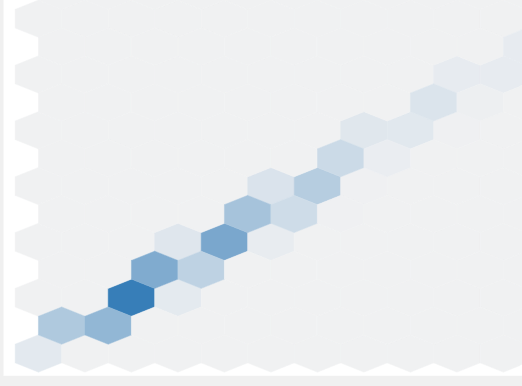

<b>Fisher</b>
<p>Extend, Tichkness and Aspect_Ratio have the lowest Iportance while Area and Eccentricity have the highest</p>

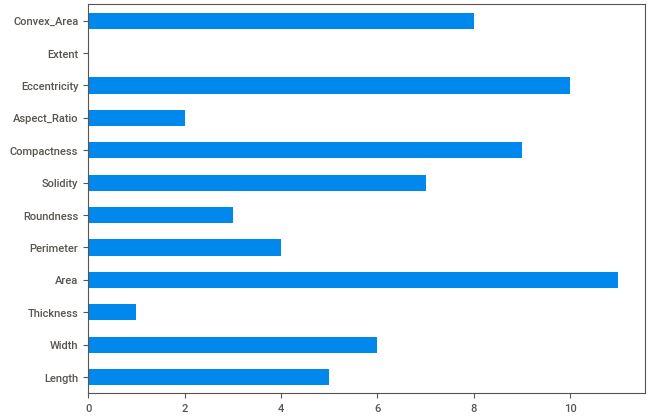

<h2>2. Problems</h2>
<b>Please read the -tests.ipynb for this chapter, since those points where analysed while preparing the data to be reportable</b>

<b>An overall problem is:</b>
<p>Depending on wich correlation matrix you look at, there are no too high or too low correlations with Type<br> They are all between 0.4 and +-0.1 
<br> Extremly low correlations like extend in ydata (-0.036) are 0.39254 in phik</p>

<h4>Associations</h4>
<p>They are perfectly symetrical wich is a bit problematic since this means there is not a lot need for optimization</p>

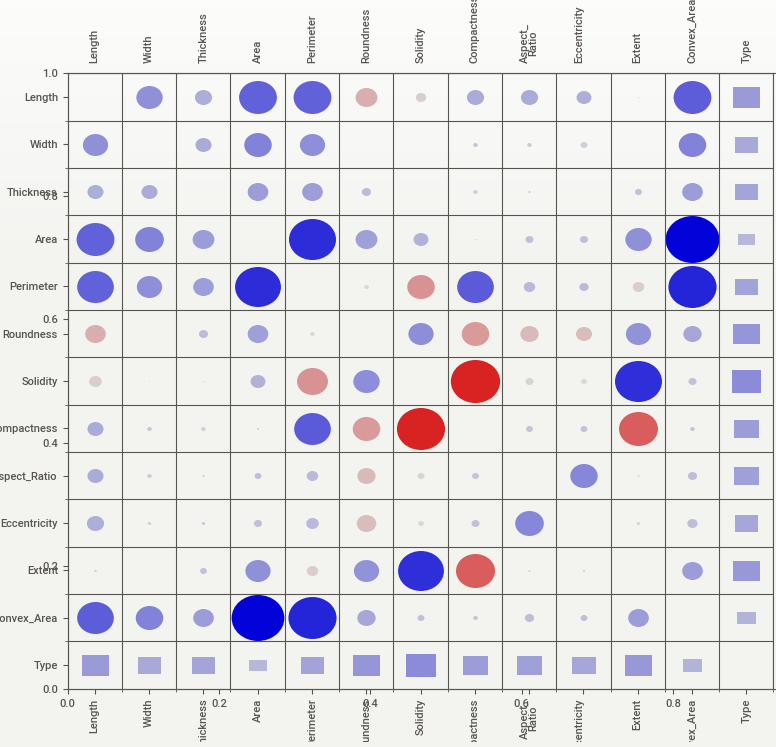

<h2>3. Overlapping and Noise</h2>

<b>Already written in Problems:</b>
<p>Convex Area is Overlapping and Redundant with Area</p>
<p>Thickness has an Overall low value in all the Tests, this one can be removed i think</p>

<p>Important for the type in the example of how much the type differenciates:</p>
<ul><li>width</li><li>lenght</li><li>Eccentricity</li><li>Roundness</li></ul>>
i will focus on those

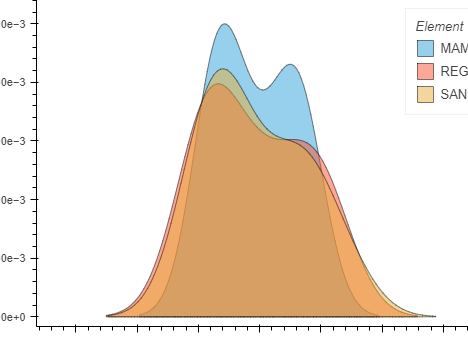
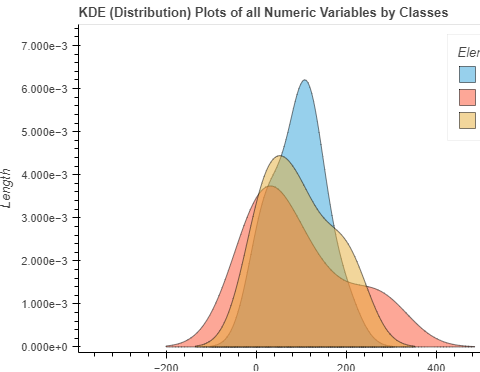
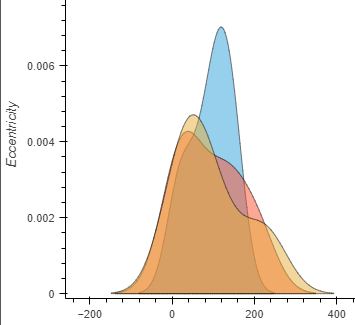
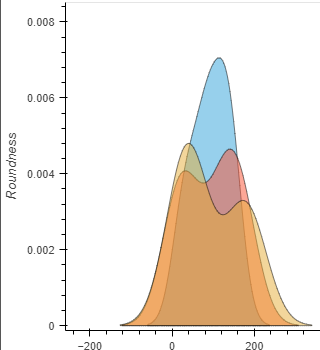

<h2>4. Outliers</h2>

In [45]:
def find_outliers(col):
    q1 = col.quantile(.25)
    q3 = col.quantile(.80)
    IQR = q3 - q1
    ll = q1 - (1.5*IQR)
    ul = q3 + (1.5*IQR)
    upper_outliers = col[col > ul].index.tolist()
    lower_outliers = col[col < ll].index.tolist()
    bad_indices = list(set(upper_outliers + lower_outliers))
    return(bad_indices)
# get all bad indexes into a list
bad_indexes = []
for col in df.columns:
    if df[col].dtype in ["int64","float64"]:
        bad_indexes.append(find_outliers(df[col]))

bad_indexes = set(list(np.concatenate(bad_indexes).flat))

# how many outlier rows we have
print(len(bad_indexes))

371


<p>A removal of 370 outliers could be good, this seems like a good possibility</p>

<b>Comparison of outliers in type MAMARA and REGULAR</b>
<p>Only differenciates in the Columns found above to have a big impact on what type it is, like lenght and width</p>
<p>Overall MAMRA has a higher spread distribution and thus less "many" outliers especially seeable in soldity and compactness, aswell as extend</p>

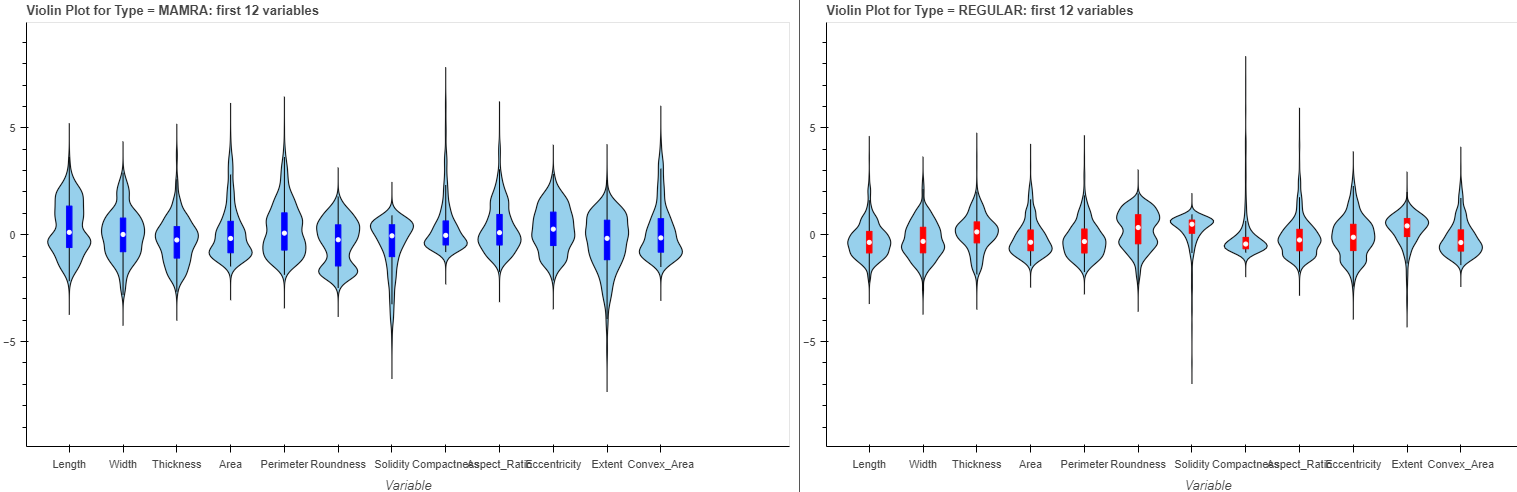

<b>Width isolated</b>
<p>big range widht outliers consider capping </p>

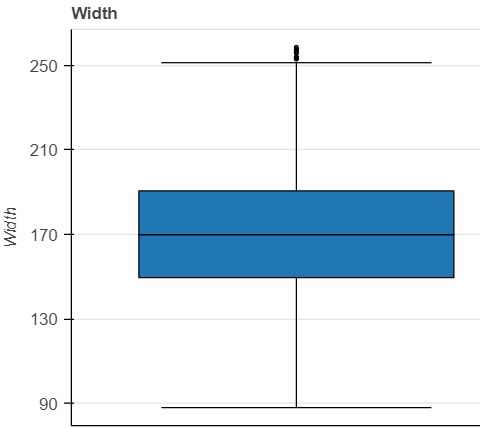
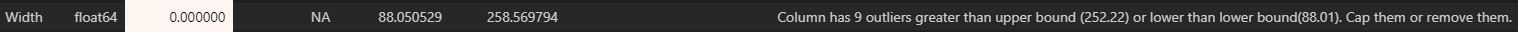

<b>lenght</b>
<p>almost same as width, i hate just pasting in screenshots without saying anythign to them but the data speaks for itself</p>

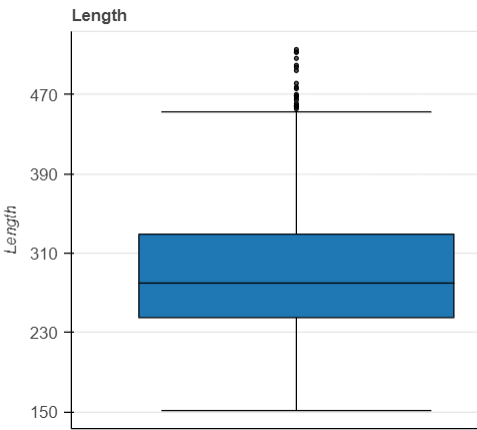


<b>eccentricity</b>
<p>Looking at the distribution graph, i disagree with the automatic outlier finding, i think there are more/ the distribution needs to be fixed with undersampeling</p>

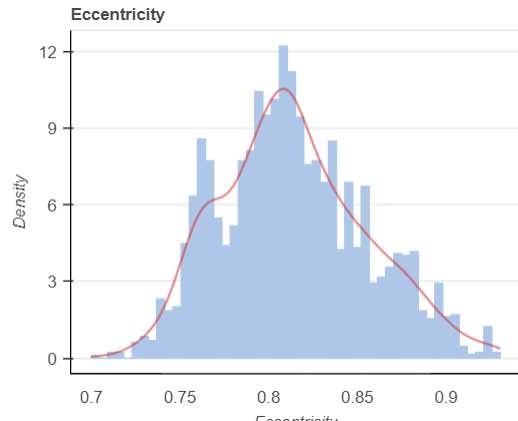


<b>Roundness</b>
<p>No outliers in the boxplot, and none according to auto viz</p>

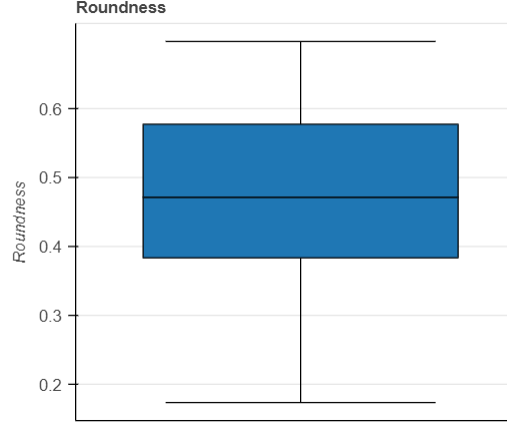

<h2>5. Distribution and Balance of Variables</h2>

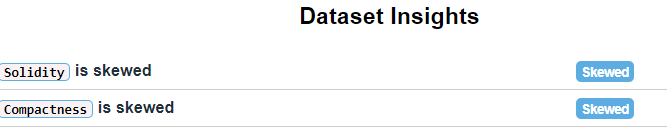

<b>Width KDE Plot</b>
<p>pretty clean with some strong outliers</p>

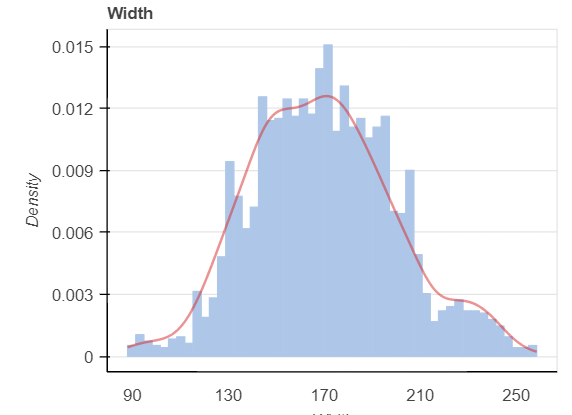

<b>Lenght</b>
<p>Left leaning</p>

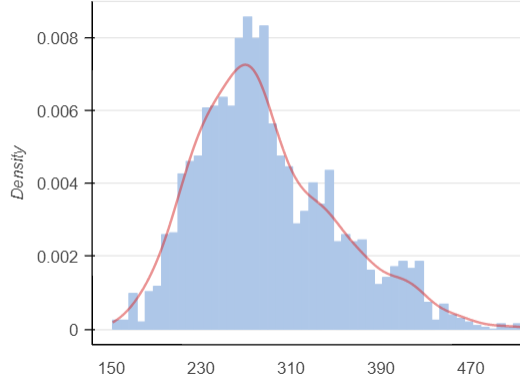

<b>Eccentricity</b>
<p>Not really clean, neds capping an maybe data filling</p>

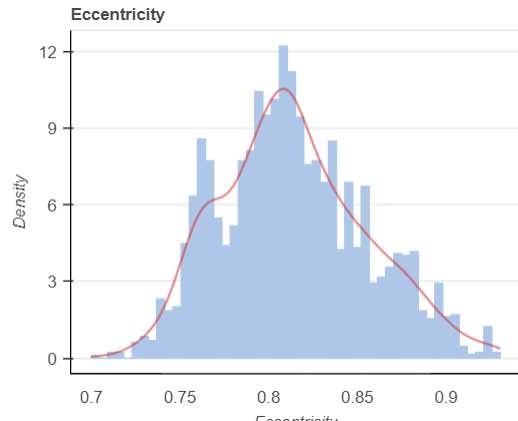

<b>Roundness</b>
<p>Looks like a case of undersampeling needed again especially for the 0.2 value</p>

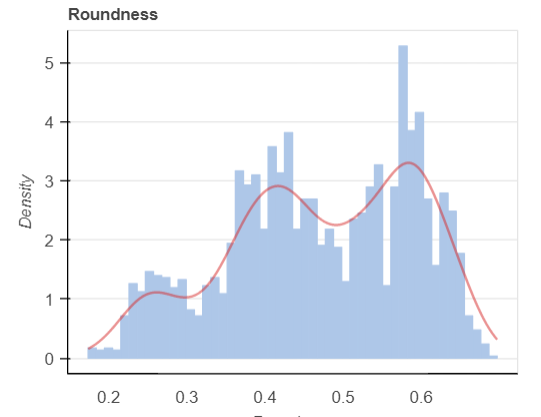

<h2>Summary</h2>

<ul>
<li>Remove:</li>
<ul><li>Convex_Area</li><li>Thickness</li></ul>
<li>Keep an Eye on:</li>
<ul><li>Compactness</li><li>Solidity</li><li>Aspect Ratio</li><p>They could be useless</p></ul>
<li>Remove or cap outliers for: basically every not dropped column</li>
<li>Use Synthetic Data or capping, for the distribution on:</li>
<ul><li>eccentricity</li><li>roundness</li></ul>
</ul>